# TAREA # 1: COMPRENDER EL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=15eGnAbma5Q_j9CZZKi46Gh3-EpgSWYOV"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Clasificación de Enfermedades utilizando Deep Learning 
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1t-Q7JllEobw8YwV3wcTuMA12J9JArfwp)

![alt text](https://drive.google.com/uc?id=1pNAshUhBxksQcrTfulYmUKXUPOmWbXb0)

# TAREA # 2: IMPORTAR LIBRERÍAS Y CONJUNTO DE DATOS

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Especificar el directorio del conjunto de entrenamiento
XRay_Directory = "/content/drive/MyDrive/datasets/Dataset"

In [4]:
# Listar las carpetas de dicho directorio
os.listdir(XRay_Directory)

['1', '2', '3', '0']

In [5]:
# Utilizar el generador de imágenes para generar datos de imágenes de tensores y normalizarlos
# Utilizar el 20% de los datos para la validación cruzada posterior
image_generator = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [6]:
# Genere lotes de 40 imágenes
# El número total de imágenes es 133 * 4 = 532 imágenes
# El entrenamiento usará es 428 (80%) y la validación usará 104 (20%)
# Realizar muestreo aleatoria y cambio del tamaño en las imágenes
train_generator = image_generator.flow_from_directory(batch_size = 40, directory = XRay_Directory, 
                                                      shuffle= True, target_size = (256, 256), class_mode = 'categorical',
                                                      subset = 'training')


Found 428 images belonging to 4 classes.


In [7]:
train_generator = image_generator.flow_from_directory(batch_size = 40, directory = XRay_Directory, 
                                                      shuffle= True, target_size = (256, 256), class_mode = 'categorical',
                                                      subset = 'validation')

Found 104 images belonging to 4 classes.


In [8]:
# Generar un lote de 40 imágenes y etiquetas
train_images, train_labels = next( train_generator )

In [9]:
train_images.shape

(40, 256, 256, 3)

In [10]:
train_labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]],

In [11]:
# Traductor de cada Etiqueta
label_names = {
    0: 'COVID-19',
    1: 'Normal',
    
    2: 'Neumonia Vírica',
    3: 'Neumonía Bacteriana'
}

# TAREA #3: VISUALIZACIÓN DEL DATASET

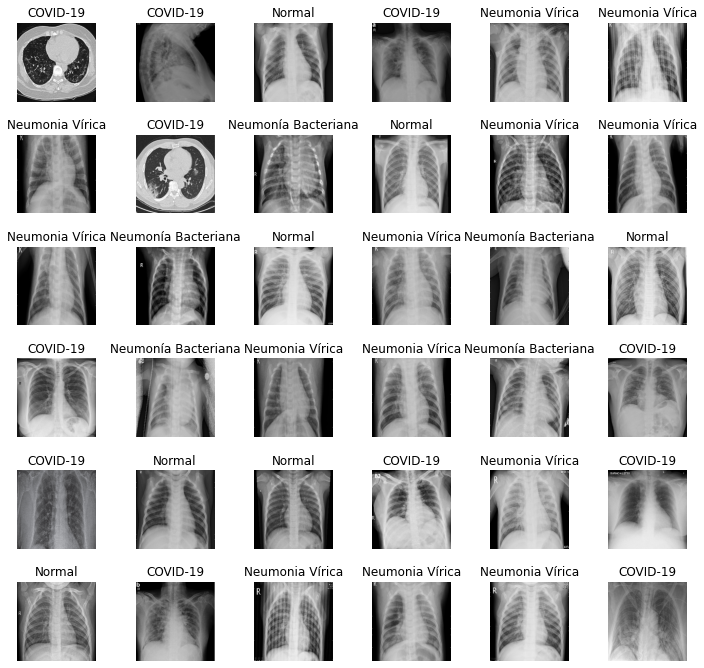

In [12]:
# Crea una matriz de 36 imágenes junto con sus etiquetas correspondientes
L = 6
W = 6

fig, axes = plt.subplots( L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W ):
  axes[i].imshow( train_images[i] )
  axes[i].set_title( label_names[np.argmax( train_labels[i] ) ] )
  axes[i].axis('off')

plt.subplots_adjust( wspace = 0.5 )
plt.show()

# TAREA #4: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRAS DE LAS REDES NEURONALES PROFUNDAS

![alt text](https://drive.google.com/uc?id=1e4bFs8Fh2Bp4ueRi9Q9SASRWZ2SwShJX)

![alt text](https://drive.google.com/uc?id=1zsKnK9bQVjUt5Z38gEK3qnIoafRR6i1c)

![alt text](https://drive.google.com/uc?id=1mL13x1d9uAItMFwtV_9r-fKqQp8DjfQo)

![alt text](https://drive.google.com/uc?id=1-se5iR8RsZ4Bold3MK60hDpL0qky7H97)

# TEORÍA #5: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DEL APRENDIZAJE POR TRANSFERENCIA

![alt text](https://drive.google.com/uc?id=1ypOE6WINmjunchutKTSUbx4FCzuYUyqC)

![alt text](https://drive.google.com/uc?id=16Rhq_7flyuy5oS1vEJ7p3l1Y8irU7Zwg)

![alt text](https://drive.google.com/uc?id=1hCdV7lmgADpw8jV7nf0KO3mMzIMuMZDM)

![alt text](https://drive.google.com/uc?id=1gHDvwWJBBD5d94HPpSydQLb6pjTfknrK)

# TAREA #6: IMPORTAR EL MODELO CON PESOS PRE ENTRENADOS

In [13]:
basemodel1 = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input( shape = (256, 256, 3)))

94781440/94765736 [==============================] - 1s 0us/step


In [14]:
basemodel1.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [15]:
# Congelar el modelo hasta las últimas etapas - 4 y llevar a cabo un re entrenamiento -5 
for layer in basemodel1.layers[:-10]:
  layer.trainable = False

# TAREA #7: CONSTRUIR Y ENTRENAR UN MODELO DE DEEP LEARNING

In [24]:
headmodel = basemodel1.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name = 'flatten')(headmodel)
headmodel = Dense( units = 256, activation = 'relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
haedmodel = Dense( units = 128, activation = 'relu')(headmodel)
headmodel = Dropout(0.2)(headmodel)
haedmodel = Dense( units = 64, activation = 'relu')(headmodel)
headmodel = Dropout(0.5)(headmodel)
headmodel = Dense( units = 4, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel1.input, outputs = headmodel)

In [25]:
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4, decay = 1e-6), metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [26]:
# Usar la parada temprana (early stopping) para salir del entrenamiento si la pérdida en la validación no disminuye incluso después de ciertas épocas (paciencia)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
# Almacenar el mejor modelo con la menor pérdida en la validación
checkpointer = ModelCheckpoint(filepath = 'weights.hdf5', verbose = 1, save_best_only = True)

In [40]:
train_generator = image_generator.flow_from_directory(batch_size = 4, directory= XRay_Directory, shuffle = True, target_size = (256, 256), class_mode = 'categorical', subset = 'training')
val_generator = image_generator.flow_from_directory(batch_size = 4, directory= XRay_Directory, shuffle = True, target_size = (256, 256), class_mode = 'categorical', subset = 'validation')

Found 460 images belonging to 5 classes.
Found 112 images belonging to 5 classes.


In [33]:
history = model.fit_generator(train_generator, steps_per_epoch = train_generator.n // 4, epochs = 50, 
                              validation_data = val_generator, validation_steps = val_generator.n // 4,
                                callbacks = [checkpointer, earlystopping ] )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/50
107/107 [==============================] - ETA: 0s - loss: 0.3438 - accuracy: 0.8855
Epoch 00001: val_loss did not improve from 0.55954
107/107 [==============================] - 14s 134ms/step - loss: 0.3438 - accuracy: 0.8855 - val_loss: 0.5961 - val_accuracy: 0.8558
Epoch 2/50
107/107 [==============================] - ETA: 0s - loss: 0.3715 - accuracy: 0.8972
Epoch 00002: val_loss did not improve from 0.55954
107/107 [==============================] - 14s 134ms/step - loss: 0.3715 - accuracy: 0.8972 - val_loss: 0.9454 - val_accuracy: 0.7404
Epoch 3/50
107/107 [==============================] - ETA: 0s - loss: 0.2959 - accuracy: 0.9019
Epoch 00003: val_loss did not improve from 0.55954
107/107 [==============================] - 14s 133ms/step - loss: 0.2959 - accuracy: 0.9019 - val_loss: 1.5963 - val_accuracy: 0.7308
Epoch 4/50
107/107 [==============================] - ETA: 0s - loss: 0.4137 - accuracy: 0.8738
Epoch 00004: val_loss did not improve from 0.55954
107/107 [=

# TAREA #8: EVALUAR EL MODELO DE DEEP LEARNING ENTRENADO

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

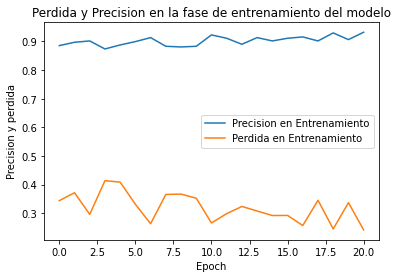

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title('Perdida y Precision en la fase de entrenamiento del modelo')
plt.xlabel('Epoch')
plt.ylabel('Precision y perdida')
plt.legend(['Precision en Entrenamiento', 'Perdida en Entrenamiento'])

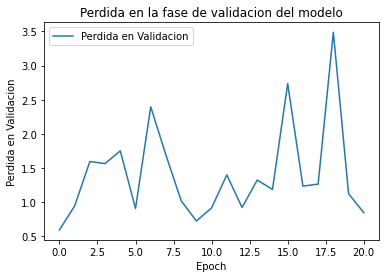

In [36]:
plt.plot(history.history['val_loss'])

plt.title('Perdida en la fase de validacion del modelo')
plt.xlabel('Epoch')
plt.ylabel('Perdida en Validacion')
plt.legend(['Perdida en Validacion'])

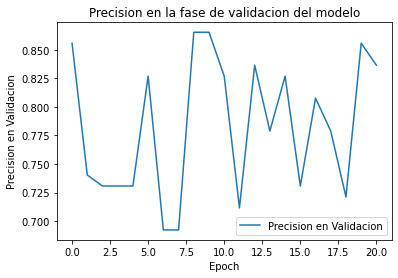

In [37]:
plt.plot(history.history['val_accuracy'])

plt.title('Precision en la fase de validacion del modelo')
plt.xlabel('Epoch')
plt.ylabel('Precision en Validacion')
plt.legend(['Precision en Validacion'])

In [38]:
test_directory = '/content/drive/MyDrive/datasets/Dataset/Test'

In [41]:
test_gen = ImageDataGenerator(rescale = 1./255)
test_generator = image_generator.flow_from_directory(batch_size = 40, directory= test_directory, shuffle = True, target_size = (256, 256), class_mode = 'categorical')

evaluate = model.evaluate_generator(test_generator, steps = test_generator.n // 4, verbose = 1)

print('Precision en la fase de Test : {}'.format(evaluate[1]))

Found 40 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


10/10 [==============================] - 3s 7ms/step - loss: 2.2618 - accuracy: 0.6750
Precision en la fase de Test : 0.675000011920929


In [49]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

prediction = []
original = []
image = []

for i in range(len(os.listdir(test_directory))):
  for item in os.listdir(os.path.join(test_directory, str(i))):
    img = cv2.imread(os.path.join(test_directory, str(i), item))
    img = cv2.resize(img, (256, 256))
    image.append(img)
    img = img/255
    img = img.reshape(-1, 256, 256, 3)
    predict = model.predict(img)
    predict = np.argmax(predict)
    prediction.append(predict)
    original.append(i)



In [50]:
len(original)

40

In [51]:
len(prediction)

40

In [52]:
score = accuracy_score(original, prediction)
print('Eficacia de laprediccion {}'.format(score))

Eficacia de laprediccion 0.675


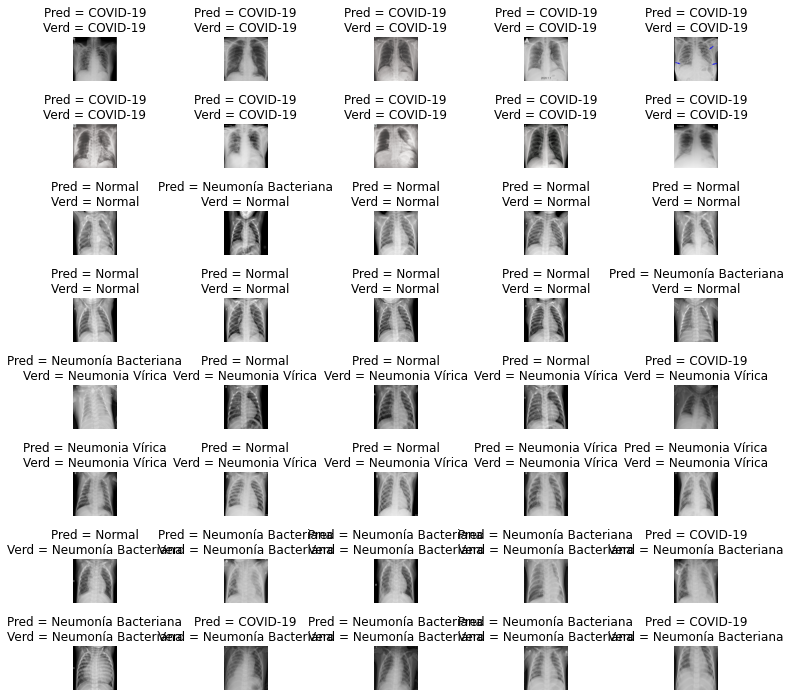

In [55]:
L = 8
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
  axes[i].imshow(image[i])
  axes[i].set_title('Pred = {}\nVerd = {}'.format(str(label_names[prediction[i]]), str(label_names[original[i]])))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2, hspace = 1)

In [56]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.57      0.80      0.67        10
           2       1.00      0.30      0.46        10
           3       0.67      0.60      0.63        10

    accuracy                           0.68        40
   macro avg       0.74      0.68      0.65        40
weighted avg       0.74      0.68      0.65        40



Text(0.5, 1.0, 'Matriz de confusion')

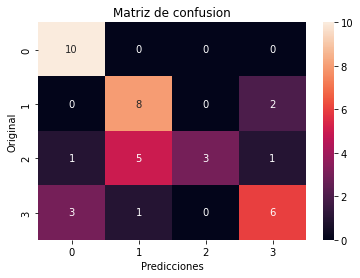

In [57]:
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel('Predicciones')
ax.set_ylabel('Original')
ax.set_title('Matriz de confusion')

# BUEN TRABAJO! PUEDES ESTAR ORGULLOSO DE TUS NUEVAS HABILIDADES ADQUIRIDAS
